In [440]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from xgboost import XGBRegressor
from sklearn.svm import SVR
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing Our Data

In [441]:
# Load our dataset 
df=pd.read_csv('BTC-USD.csv')

In [442]:
df.shape

(2922, 7)

In [443]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  2922
Total number of fields present in the dataset:  7


In [444]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2015-09-01  230.255997  231.216003  226.860001  228.121002  228.121002   
1  2015-09-02  228.026993  230.576996  226.475006  229.283997  229.283997   
2  2015-09-03  229.324005  229.604996  226.667007  227.182999  227.182999   
3  2015-09-04  227.214996  230.899994  227.050995  230.298004  230.298004   
4  2015-09-05  230.199005  236.143005  229.442993  235.018997  235.018997   

     Volume  
0  20575200  
1  18760400  
2  17482000  
3  20962400  
4  20671400

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2922 non-null   object 
 1   Open       2922 non-null   float64
 2   High       2922 non-null   float64
 3   Low        2922 non-null   float64
 4   Close      2922 non-null   float64
 5   Adj Close  2922 non-null   float64
 6   Volume     2922 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.9+ KB


In [446]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   2922.000000   2922.000000   2922.000000   2922.000000   2922.000000   
mean   15479.626481  15850.306353  15072.573560  15486.915033  15486.915033   
std    16186.338378  16586.089748  15727.467417  16181.703505  16181.703505   
min      226.968994    229.604996    225.117004    227.085007    227.085007   
25%     3501.313599   3609.798462   3446.208863   3521.071045   3521.071045   
50%     9027.951172   9216.074219   8808.764160   9044.665528   9044.665528   
75%    23640.585449  24125.971192  23169.337891  23653.792969  23653.792969   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.922000e+03  
mean   1.849248e+10  
std    1.959359e+10  
min    1.271260e+07  
25%    1.755440e+09  
50%    1.475210e+10  
75%    2.937604e+10  
max    3.509679e+11

In [447]:
# Checking for Null Values
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

# If dataset had null values we can use this code to drop all the null values present in the dataset

# df= df.dropna()

Null Values: 0
NA values: False


In [448]:
# Final shape of the dataset after dealing with null values 

df.shape

(2922, 7)

In [449]:
# Printing the start date and End date of the dataset
# For our case we have taken data from 1st Sept 2015 to 31th Aug 2023
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2015-09-01
Ending Date 2023-08-31


# Exploratory Data Analysis

# Analysis of Year 2015

In [450]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # changing to datetime format for simplicity

y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
0   2015-09-01  230.255997  231.216003  226.860001  228.121002
1   2015-09-02  228.026993  230.576996  226.475006  229.283997
2   2015-09-03  229.324005  229.604996  226.667007  227.182999
3   2015-09-04  227.214996  230.899994  227.050995  230.298004
4   2015-09-05  230.199005  236.143005  229.442993  235.018997
..         ...         ...         ...         ...         ...
117 2015-12-27  416.514008  424.006989  408.882996  422.822998
118 2015-12-28  423.342987  429.769012  418.480988  422.278992
119 2015-12-29  422.097992  432.983002  420.627014  432.983002
120 2015-12-30  433.299988  434.386993  422.084015  426.619995
121 2015-12-31  425.875000  432.920990  418.734985  430.566986

[122 rows x 5 columns]

In [451]:
# Grouping the data based on the month and finding the mean of opening and closing price for the respective month

monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January           NaN         NaN
February          NaN         NaN
March             NaN         NaN
April             NaN         NaN
May               NaN         NaN
June              NaN         NaN
July              NaN         NaN
August            NaN         NaN
September  233.486733  233.595533
October    262.306000  264.855356
November   346.866833  348.883332
December   422.618033  424.464547

In [452]:
# Visual Representation of the above table
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [453]:
# Visualizing the maximum high price and minimum low price for each month

y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [454]:
# Visualizing all the prices
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2016

In [455]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
122 2016-01-01  430.721008  436.246002  427.515015  434.334015
123 2016-01-02  434.622009  436.062012  431.869995  433.437988
124 2016-01-03  433.578003  433.743011  424.705994  430.010986
125 2016-01-04  430.061005  434.516998  429.084015  433.091003
126 2016-01-05  433.069000  434.182007  429.675995  431.959991
..         ...         ...         ...         ...         ...
483 2016-12-27  908.354004  940.047974  904.255005  933.197998
484 2016-12-28  934.830994  975.921021  934.830994  975.921021
485 2016-12-29  975.125000  979.396973  954.502991  973.497009
486 2016-12-30  972.534973  972.534973  934.833008  961.237976
487 2016-12-31  960.627014  963.742981  947.236023  963.742981

[366 rows x 5 columns]

In [456]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    412.805902  410.844485
February   402.304692  404.408274
March      417.262033  416.525774
April      433.487433  434.339398
May        459.237547  461.954415
June       638.544834  642.869061
July       662.977779  661.356103
August     581.238966  579.585197
September  604.614034  605.848633
October    640.702546  643.550935
November   725.073804  726.349101
December   821.108255  828.060356

In [457]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [458]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [459]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'], 
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [460]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2017 = df.loc[(df['Date'] >= '2017-01-01')
                     & (df['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
488 2017-01-01    963.658020   1003.080017    958.698975    998.325012
489 2017-01-02    998.617004   1031.390015    996.702026   1021.750000
490 2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966
491 2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980
492 2017-01-05   1156.729980   1191.099976    910.416992   1013.380005
..         ...           ...           ...           ...           ...
848 2017-12-27  16163.500000  16930.900391  15114.299805  15838.500000
849 2017-12-28  15864.099609  15888.400391  13937.299805  14606.500000
850 2017-12-29  14695.799805  15279.000000  14307.000000  14656.200195
851 2017-12-30  14681.900391  14681.900391  12350.099609  12952.200195
852 2017-12-31  12897.700195  14377.400391  12755.599609  14156.400391

[365 rows x 5 columns]

In [461]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January      914.680971    914.916159
February    1055.620071   1062.533672
March       1133.212576   1129.365228
April       1197.646997   1206.641007
May         1865.748712   1895.383529
June        2630.573332   2636.204346
July        2509.213233   2519.418386
August      3819.812579   3880.989998
September   4077.400993   4064.836312
October     5291.370007   5360.071604
November    7685.745996   7813.132975
December   15175.219601  15294.270980

In [462]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [463]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [464]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [465]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
853  2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
854  2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
855  2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
856  2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
857  2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...         ...           ...           ...           ...           ...
1213 2018-12-27   3854.688477   3874.416992   3645.448486   3654.833496
1214 2018-12-28   3653.131836   3956.135986   3642.632080   3923.918701
1215 2018-12-29   3932.491699   3963.758789   3820.408691   3820.408691
1216 2018-12-30   3822.384766   3901.908936   3797.219238   3865.952637
1217 2018-12-31   3866.839111   3868.742920   3725.867432   3742.700439

[365 rows x 5 columns]

In [466]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    13212.074219  13085.558090
February    9462.242920   9472.001151
March       9156.591718   9040.557097
April       7963.618311   8033.596631
May         8505.240675   8450.997732
June        6829.257975   6793.507666
July        7101.466450   7146.349987
August      6723.800955   6700.129946
September   6622.821338   6610.675033
October     6494.016491   6485.118747
November    5481.615120   5404.250171
December    3726.475106   3717.488344

In [467]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [468]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [469]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [470]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

Date         Open         High          Low        Close
1218 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020
1219 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424
1220 2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211
1221 2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529
1222 2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580
...         ...          ...          ...          ...          ...
1578 2019-12-27  7238.141113  7363.529297  7189.934082  7290.088379
1579 2019-12-28  7289.031250  7399.041016  7286.905273  7317.990234
1580 2019-12-29  7317.647461  7513.948242  7279.865234  7422.652832
1581 2019-12-30  7420.272949  7454.824219  7276.308105  7292.995117
1582 2019-12-31  7294.438965  7335.290039  7169.777832  7193.599121

[365 rows x 5 columns]

In [471]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     3709.705645   3701.554963
February    3697.178327   3711.907261
March       3967.740400   3976.069100
April       5136.813314   5178.469434
May         7205.208024   7309.694131
June        9339.480322   9415.900179
July       10691.706055  10669.336158
August     10657.745621  10643.248362
September   9858.141813   9814.067871
October     8382.432129   8411.929168
November    8427.103516   8373.572412
December    7296.351625   7284.013042

In [472]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [473]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [474]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [475]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                     & (df['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1583 2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316
1584 2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215
1585 2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277
1586 2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738
1587 2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383
...         ...           ...           ...           ...           ...
1944 2020-12-27  26439.373047  28288.839844  25922.769531  26272.294922
1945 2020-12-28  26280.822266  27389.111328  26207.640625  27084.808594
1946 2020-12-29  27081.810547  27370.720703  25987.298828  27362.437500
1947 2020-12-30  27360.089844  28937.740234  27360.089844  28840.953125
1948 2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703

[366 rows x 5 columns]

In [476]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     8318.949597   8389.270476
February    9656.215113   9630.722185
March       6943.507009   6871.016113
April       7150.611328   7224.477328
May         9237.761530   9263.151745
June        9499.797005   9489.227214
July        9519.383852   9589.899729
August     11639.097215  11652.394185
September  10689.700163  10660.276856
October    11791.307491  11886.978201
November   16450.121647  16645.757422
December   21680.540827  21983.137097

In [477]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [478]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [479]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [480]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                     & (df['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1949 2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344
1950 2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578
1951 2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438
1952 2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063
1953 2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688
...         ...           ...           ...           ...           ...
2308 2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625
2309 2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969
2310 2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469
2311 2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938
2312 2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000

[364 rows x 5 columns]

In [481]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    34652.961694  34761.649950
February   45874.967216  46306.798968
March      54544.678176  54998.008695
April      57251.256250  57206.720052
May        47105.828503  46443.286668
June       35920.546940  35845.154688
July       34234.212450  34444.973790
August     45516.119834  45709.022682
September  46041.859375  45939.771484
October    57344.743952  57911.970514
November   60857.520313  60621.488802
December   49753.779818  49361.767969

In [482]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [483]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [484]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [485]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                     & (df['Date'] < '2022-12-31')]

y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2314 2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500
2315 2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750
2316 2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188
2317 2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219
2318 2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906
...         ...           ...           ...           ...           ...
2673 2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688
2674 2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828
2675 2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266
2676 2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797
2677 2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938

[364 rows x 5 columns]

In [486]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    41368.073463  41114.422379
February   40591.103934  40763.474051
March      41889.148438  41966.237525
April      41694.653646  41435.319662
May        31900.711127  31706.105217
June       24783.338477  24383.685482
July       21424.733052  21539.253843
August     22471.866557  22366.266318
September  19821.353711  19804.779232
October    19616.090285  19650.525643
November   17711.480599  17600.814323
December   16981.775651  16963.012565

In [487]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [488]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [489]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [490]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2023 = df.loc[(df['Date'] >= '2023-01-01')
                     & (df['Date'] < '2023-09-01')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2679 2023-01-01  16547.914063  16630.439453  16521.234375  16625.080078
2680 2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703
2681 2023-01-03  16688.847656  16760.447266  16622.371094  16679.857422
2682 2023-01-04  16680.205078  16964.585938  16667.763672  16863.238281
2683 2023-01-05  16863.472656  16884.021484  16790.283203  16836.736328
...         ...           ...           ...           ...           ...
2917 2023-08-27  26008.242188  26165.373047  25965.097656  26089.693359
2918 2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391
2919 2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578
2920 2023-08-30  27726.083984  27760.160156  27069.207031  27297.265625
2921 2023-08-31  27301.929688  27456.078125  25752.929688  25931.472656

[243 rows x 5 columns]

In [491]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    20043.860131  20250.717490
February   23304.086007  23304.539202
March      24945.340411  25116.900895
April      28823.841732  28857.574544
May        27562.723160  27499.307145
June       27651.926758  27763.198438
July       30098.767578  30057.469947
August     27959.756615  27852.792843
September           NaN           NaN
October             NaN           NaN
November            NaN           NaN
December            NaN           NaN

In [492]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [493]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [494]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2015-2023

In [495]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2015-09-01')
                     & (df['Date'] <= '2023-09-01')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
0    2015-09-01    230.255997    231.216003    226.860001    228.121002
1    2015-09-02    228.026993    230.576996    226.475006    229.283997
2    2015-09-03    229.324005    229.604996    226.667007    227.182999
3    2015-09-04    227.214996    230.899994    227.050995    230.298004
4    2015-09-05    230.199005    236.143005    229.442993    235.018997
...         ...           ...           ...           ...           ...
2917 2023-08-27  26008.242188  26165.373047  25965.097656  26089.693359
2918 2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391
2919 2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578
2920 2023-08-30  27726.083984  27760.160156  27069.207031  27297.265625
2921 2023-08-31  27301.929688  27456.078125  25752.929688  25931.472656

[2922 rows x 5 columns]

In [496]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    15329.138953  15328.616749
February   16651.693060  16727.495150
March      17874.685095  17939.335053
April      18706.491126  18697.142257
May        16730.307410  16628.735073
June       14661.683205  14621.218384
July       14530.307556  14578.507243
August     16171.179793  16173.053691
September  12243.672270  12216.731369
October    13727.871113  13826.875021
November   14710.690979  14691.781067
December   14470.288007  14468.031544

In [497]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building Models and Data pre-processing

First Step is Preparing Data for Training and Testing

In [498]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2922, 2)


In [499]:
closedf = closedf[closedf['Date'] >= '2015-09-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2922


In [500]:
closedf

Date         Close
0    2015-09-01    228.121002
1    2015-09-02    229.283997
2    2015-09-03    227.182999
3    2015-09-04    230.298004
4    2015-09-05    235.018997
...         ...           ...
2917 2023-08-27  26089.693359
2918 2023-08-28  26106.150391
2919 2023-08-29  27727.392578
2920 2023-08-30  27297.265625
2921 2023-08-31  25931.472656

[2922 rows x 2 columns]

In [501]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [502]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2922, 1)


* ### Slicing data into Training set and Testing set

In [503]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2191, 1)
test_data:  (731, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [504]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [505]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2175, 15)
y_train:  (2175,)
X_test:  (715, 15)
y_test (715,)


# XGBoost model

In [506]:
# Building Model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [507]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.04697706980967923
Mean Squared Error - MSE : 0.0036663084679469113
Root Mean squared Error - RMSE : 0.060550049281127026


In [508]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2175, 1)
Test data prediction: (715, 1)


In [509]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [510]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price using XGBoost',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [511]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [512]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [513]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [514]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score

In [515]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9999622516447317
Test data R2 score: 0.8940071322364832


# LSTM Model

In [516]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2175, 15, 1)
X_test:  (715, 15, 1)


In [517]:
model=Sequential()
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.add(LSTM(5, input_shape=(None, 1), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1)) 

model.add(Dense(1))


model.compile(loss="mean_squared_error",optimizer="adam")

In [518]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
67/68 [============================>.] - ETA: 0s - loss: 0.0502

68/68 [==============================] - 1s 4ms/step - loss: 0.0498 - val_loss: 0.0424
Epoch 2/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0172
Epoch 3/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0142
Epoch 4/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0103
Epoch 5/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0092
Epoch 6/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 7/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0062
Epoch 8/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 9/20
68/68 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0054
Epoch 10/20
68/68 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0047
Epoch 11/20
68/68 [===========

- ### Plotting Loss vs Validation loss 

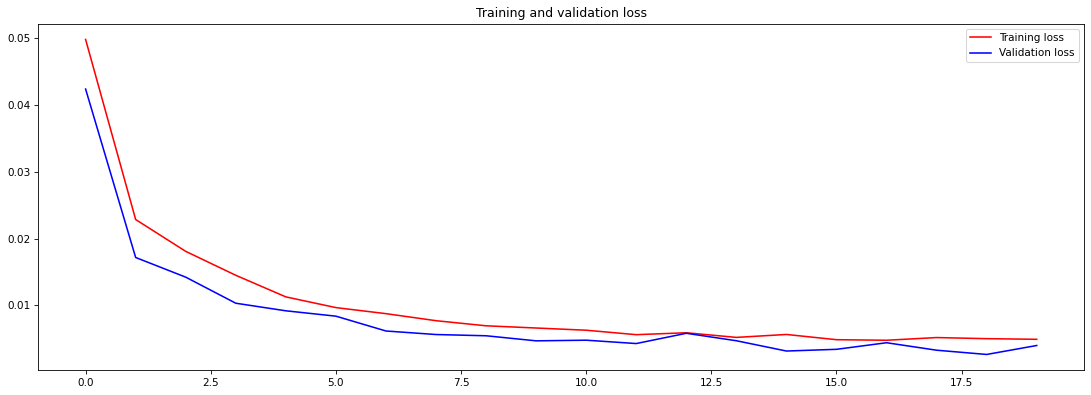

<Figure size 1350x450 with 0 Axes>

In [519]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [520]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

23/23 [==============================] - 0s 754us/step


((2175, 1), (715, 1))

In [521]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, test_predict)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, test_predict)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, test_predict))))

Mean Absolute Error - MAE : 0.045038307162166176
Mean Squared Error - MSE : 0.002706603202370853
Root Mean squared Error - RMSE : 0.05202502477049725


- # Model Evaluation

In [522]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## R square score

In [523]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9732582371023776
Test data R2 score: 0.9217521760687091


- # Comparision of original stock close price and predicted close price

In [524]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [525]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))
print(lst_output)

Output of predicted next days:  30
[[0.3465866148471832], [0.33929798007011414], [0.3320164978504181], [0.32476142048835754], [0.3175518214702606], [0.3104219138622284], [0.3033852279186249], [0.2963930666446686], [0.289528489112854], [0.28277623653411865], [0.2761302590370178], [0.2695789635181427], [0.2631317675113678], [0.25661206245422363], [0.25025632977485657], [0.24416564404964447], [0.2384437918663025], [0.23287594318389893], [0.2274617999792099], [0.2222001850605011], [0.21708956360816956], [0.21212786436080933], [0.20731282234191895], [0.2026425004005432], [0.19811415672302246], [0.19372515380382538], [0.18947285413742065], [0.18535465002059937], [0.18136784434318542], [0.17751091718673706]]


In [526]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [527]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [528]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Prophet

In [529]:
import prophet
from prophet import Prophet
# print version number
print('Prophet %s' % prophet.__version__)
df_p = pd.DataFrame()

Prophet 1.1.4


In [530]:
df_p['ds'] = df[['Date']]
#df_p['y'] = df[['Close']]
df_p['y'] = scaler.fit_transform(np.array(df[['Close']]).reshape(-1,1))
model = Prophet()
model.fit(df_p)

10:16:31 - cmdstanpy - INFO - Chain [1] start processing


10:16:32 - cmdstanpy - INFO - Chain [1] done processing


In [531]:
df_p

ds         y
0    2015-09-01  0.000015
1    2015-09-02  0.000033
2    2015-09-03  0.000001
3    2015-09-04  0.000048
4    2015-09-05  0.000118
...         ...       ...
2917 2023-08-27  0.384062
2918 2023-08-28  0.384306
2919 2023-08-29  0.408382
2920 2023-08-30  0.401994
2921 2023-08-31  0.381712

[2922 rows x 2 columns]

In [532]:
future_dates = model.make_future_dataframe(periods=30)

In [533]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
f = forecast['yhat']
g=forecast[forecast['ds']>'2023-08-31']
g=g['yhat']


In [534]:
predicted_values = forecast['yhat']

squared_differences = (df_p['y'] - predicted_values[:-30]) ** 2

mse = np.mean(squared_differences)

rmse = np.sqrt(mse)
print("Mean Squared Error - MSE : ",mse)
print("Root Mean squared Error - RMSE : ", rmse)


Mean Squared Error - MSE :  0.006161225186101919
Root Mean squared Error - RMSE :  0.07849347225153133


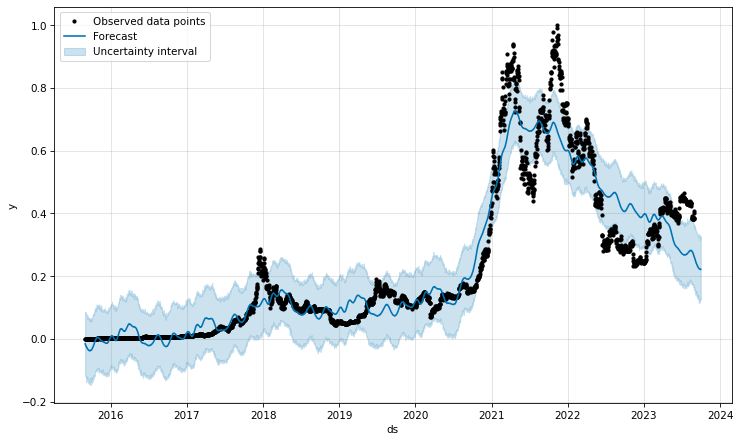

In [535]:
fig2 = model.plot(forecast, uncertainty=True)
#show legend
plt.legend(loc='upper left')

In [536]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(g).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [537]:
names = cycle(['Close price'])

fig = px.line(f,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score for regression

In [538]:

print("Train data R2 score:", r2_score(predicted_values[:-30], df_p['y']))
#print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8757685335542743


# ARIMA

In [539]:
Bitcoin = df

In [540]:
Bitcoin.head()

Date        Open        High         Low       Close   Adj Close  \
0 2015-09-01  230.255997  231.216003  226.860001  228.121002  228.121002   
1 2015-09-02  228.026993  230.576996  226.475006  229.283997  229.283997   
2 2015-09-03  229.324005  229.604996  226.667007  227.182999  227.182999   
3 2015-09-04  227.214996  230.899994  227.050995  230.298004  230.298004   
4 2015-09-05  230.199005  236.143005  229.442993  235.018997  235.018997   

     Volume  
0  20575200  
1  18760400  
2  17482000  
3  20962400  
4  20671400

In [541]:
## Cleaning up the data
Bitcoin=Bitcoin.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
# Drop rows with NaN values in 'Bitcoin Close Price' column
Bitcoin = Bitcoin.dropna(subset=['Close'])
Bitcoin.rename(columns={'Close': 'Bitcoin Close Price'}, inplace=True)
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'], errors='coerce')
Bitcoin

Date  Bitcoin Close Price
0    2015-09-01           228.121002
1    2015-09-02           229.283997
2    2015-09-03           227.182999
3    2015-09-04           230.298004
4    2015-09-05           235.018997
...         ...                  ...
2917 2023-08-27         26089.693359
2918 2023-08-28         26106.150391
2919 2023-08-29         27727.392578
2920 2023-08-30         27297.265625
2921 2023-08-31         25931.472656

[2922 rows x 2 columns]

In [542]:
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2922 non-null   datetime64[ns]
 1   Bitcoin Close Price  2922 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 KB


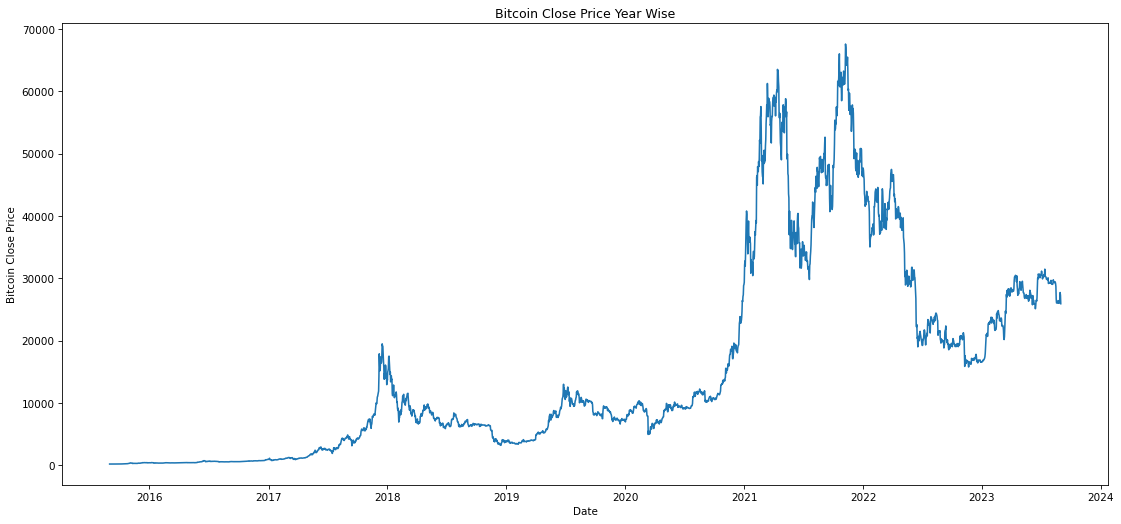

In [543]:
plt.figure(figsize = (18,8))
sns.lineplot(data=Bitcoin, x="Date", y="Bitcoin Close Price")
plt.title('Bitcoin Close Price Year Wise')
plt.show()

In [544]:
Bitcoin_eda = Bitcoin.copy()
Bitcoin_eda.set_index('Date', inplace=True)

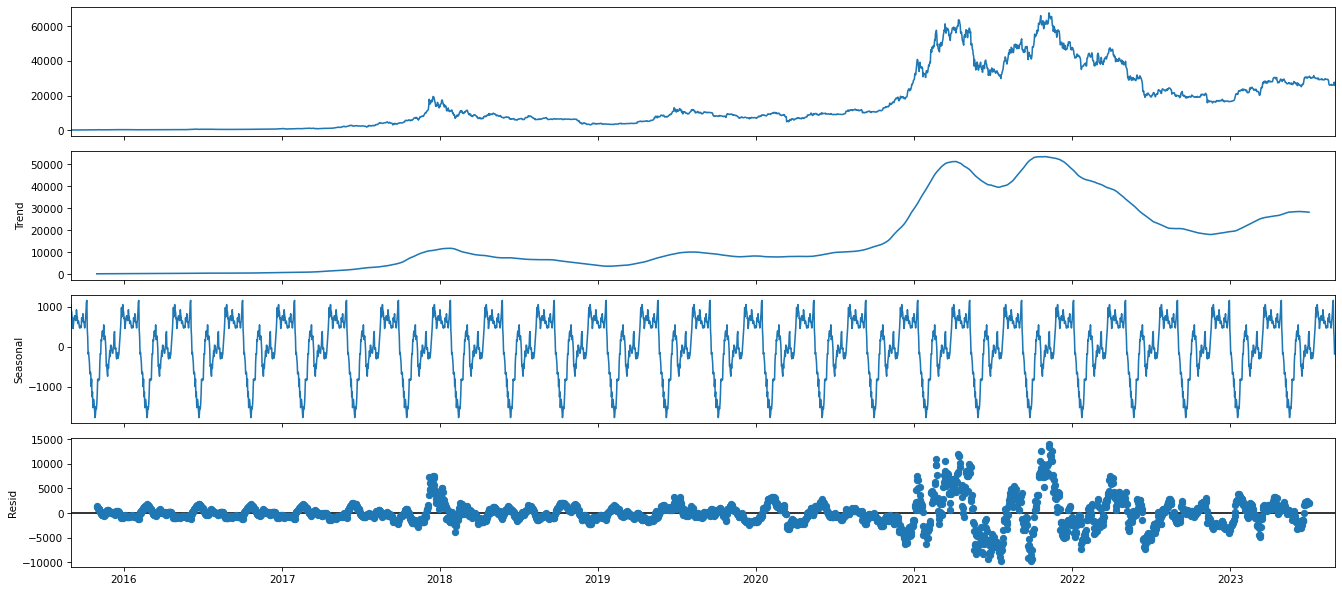

In [545]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(Bitcoin_eda, model='additive', period=120)
result.plot()
plt.show()

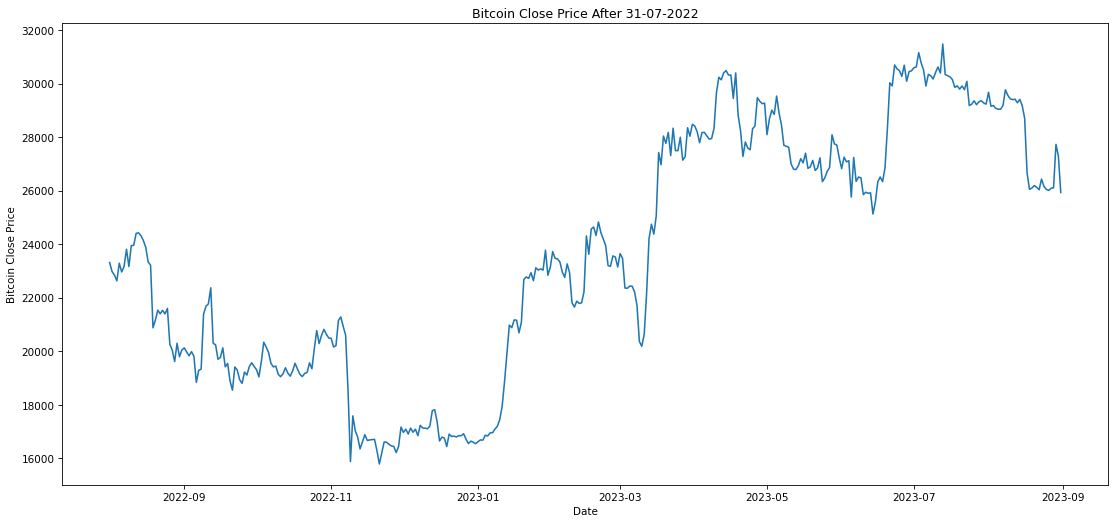

In [546]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])

# Filter data for dates after 31-07-2021
filtered_data = Bitcoin[Bitcoin['Date'] > '2022-07-31']

# Plot the filtered data
plt.figure(figsize=(18, 8))
sns.lineplot(data=filtered_data, x="Date", y="Bitcoin Close Price")
plt.title('Bitcoin Close Price After 31-07-2022')
plt.show()


In [547]:
X_train = Bitcoin[:2322]
X_test = Bitcoin[2322:]

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (2322, 2)
X_test Shape (600, 2)


In [548]:
X_train = X_train[['Date', 'Bitcoin Close Price']]
X_test = X_test[['Date', 'Bitcoin Close Price']]

X_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)

In [549]:
index_1_months = pd.date_range(X_test.index[-1], freq='D', periods=31)
index_1_months = index_1_months[1:]
index_1_months

DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
               '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30'],
              dtype='datetime64[ns]', freq='D')

Define d Using ADF Test

In [550]:
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)


ADF Test Statistic : -0.9684707554450291
p-value : 0.7645895092848924
#Lags Used : 27
Number of Observations : 2294
Critical Value : {'1%': -3.4332038066451385, '5%': -2.8628007468583427, '10%': -2.5674411527893164}
** Indicating It Is Non-Stationary **


In [551]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -7.389432355630657
p-value : 8.073702094688062e-11
#Lags Used : 27
Number of Observations : 2293
Critical Value : {'1%': -3.4332050526159112, '5%': -2.8628012970364574, '10%': -2.5674414457185817}
** Data Is Stationary **


Define p and q using PACF and ACF plot

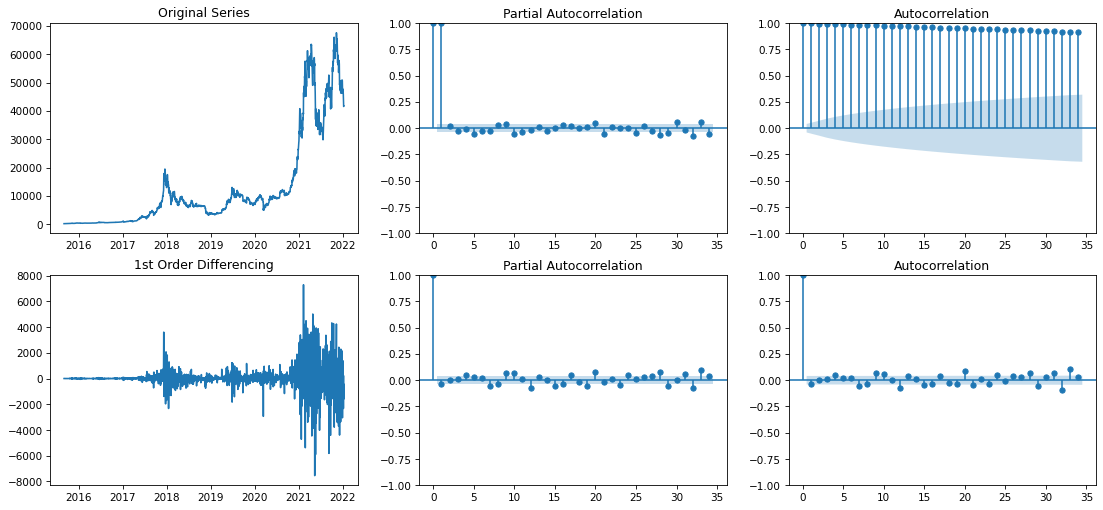

In [552]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()

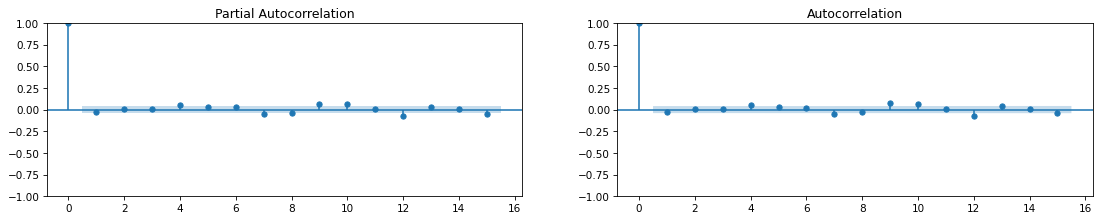

In [553]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

In [554]:
from pmdarima import auto_arima
Bitcoin_price_series = Bitcoin['Bitcoin Close Price']
stepwise_fit = auto_arima(Bitcoin_price_series, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=47530.187, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=47544.722, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47544.953, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47544.987, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=47543.052, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=47547.338, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=47548.751, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=47532.186, Time=1.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=47532.212, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=47546.902, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=47547.683, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=47547.938, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=47533.980, Time=1.79 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=47546.369, Time=0.40 sec

Best model:  ARIMA

In [555]:
model_Bitcoin = sm.tsa.arima.ARIMA(X_train, order = (2,1,1))
Bitcoin_010 = model_Bitcoin.fit()
print(Bitcoin_010.summary())

# Forecast
forecast = Bitcoin_010.forecast(steps=600)
actual = Bitcoin[2322:]['Bitcoin Close Price'].values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual, forecast))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - forecast) / actual)) * 100

# Display the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


                                SARIMAX Results                                
Dep. Variable:     Bitcoin Close Price   No. Observations:                 2322
Model:                  ARIMA(2, 1, 1)   Log Likelihood              -18855.838
Date:                 Mon, 04 Dec 2023   AIC                          37719.677
Time:                         10:16:44   BIC                          37742.676
Sample:                     09-01-2015   HQIC                         37728.058
                          - 01-08-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0159      1.936     -0.008      0.993      -3.810       3.778
ar.L2          0.0061      0.061      0.099      0.921      -0.114       0.126
ma.L1         -0.0161      1.936     -0.008 

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Define Residual and Comparison Forecast Test

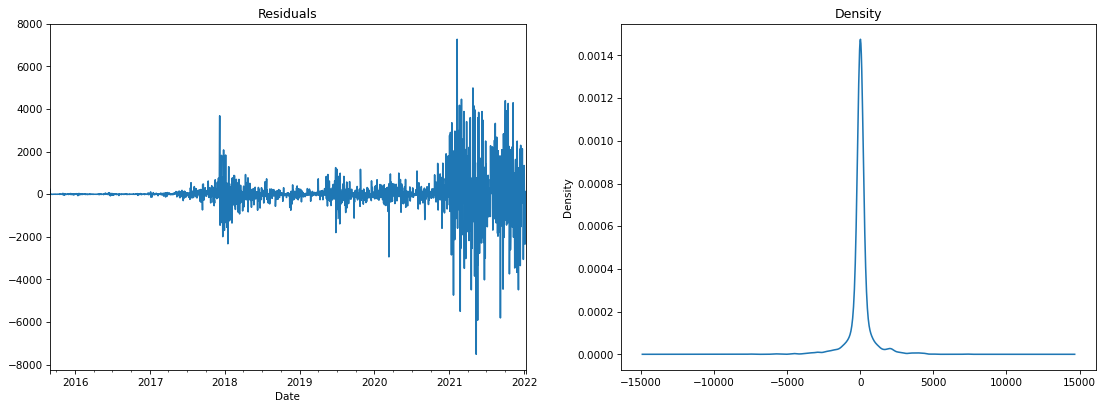

In [556]:
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
residuals = pd.Series(Bitcoin_010.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

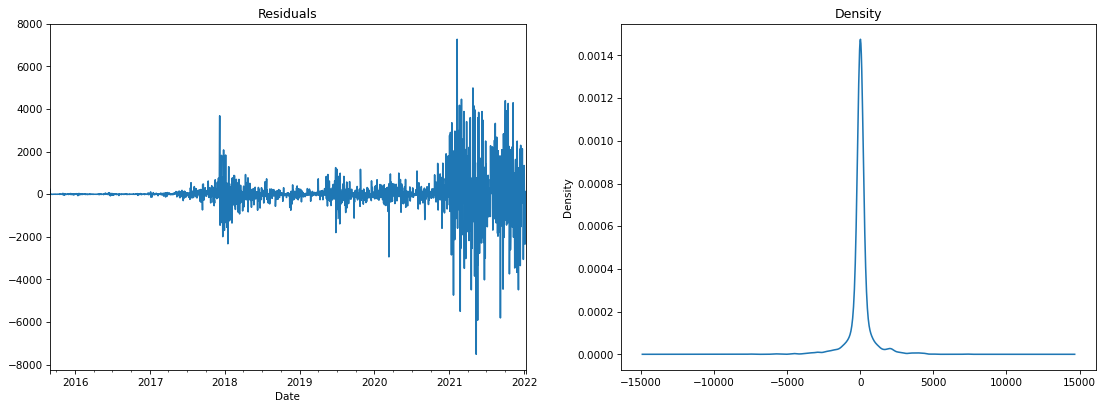

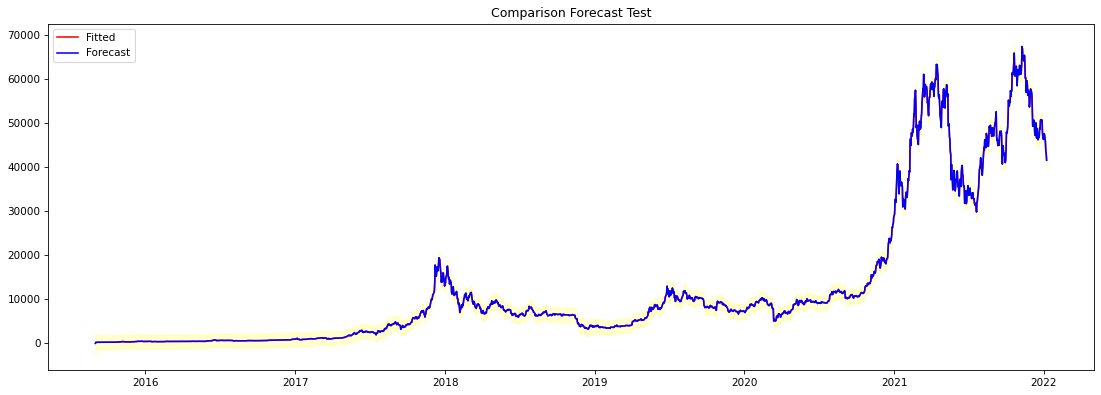

In [557]:
plt.rcParams.update({'figure.figsize':(18, 6), 'figure.dpi':75})

# Create subplots for residuals
fig, ax = plt.subplots(1,2)

# Assuming Bitcoin_010 is a time series model result with a 'resid' attribute
residuals = pd.Series(Bitcoin_010.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.show()

# Assuming Bitcoin_010 is an ARIMA model result
# Modify the following lines based on your ARIMA model attributes
pred = Bitcoin_010.get_prediction(dynamic=False)
pred_ci = pred.conf_int()
# Plotting forecast and confidence intervals
plt.plot(Bitcoin_010.fittedvalues, label='Fitted', color='red')
plt.plot(pred.predicted_mean, label='Forecast', color='blue')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='yellow', alpha=0.2)

plt.title('Comparison Forecast Test', fontsize=12)
plt.legend()
plt.show()


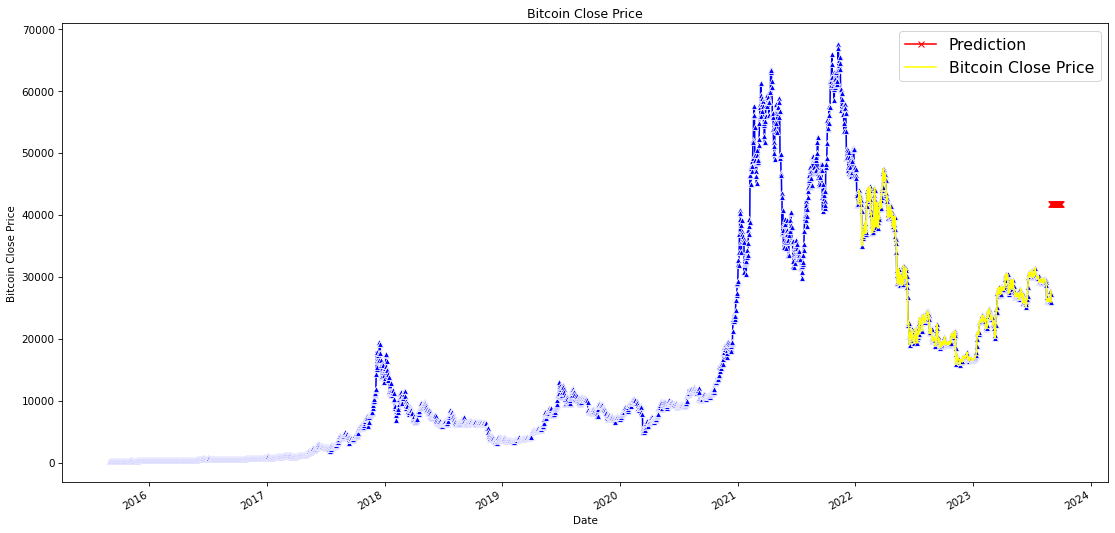

In [558]:
Bitcoin_forecast = Bitcoin_010.forecast(9)[0]
Bitcoin_forecast = pd.Series(Bitcoin_forecast, index=index_1_months)
Bitcoin_forecast = Bitcoin_forecast.rename("Prediction")

fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'Date', y='Bitcoin Close Price', data=Bitcoin, color = 'blue', marker = '^')
Bitcoin_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
X_test.plot(ax = ax, c = 'yellow')
plt.title('Bitcoin Close Price')
plt.legend(loc = 0, fontsize = 15)
plt.show()

In [559]:
Bitcoin_fcast = Bitcoin_forecast.to_frame()
Bitcoin_fcast.rename_axis("Date", inplace=True)
Bitcoin_fcast.reset_index(inplace=True)
Bitcoin_fcast

Date    Prediction
0  2023-09-01  41719.377743
1  2023-09-02  41719.377743
2  2023-09-03  41719.377743
3  2023-09-04  41719.377743
4  2023-09-05  41719.377743
5  2023-09-06  41719.377743
6  2023-09-07  41719.377743
7  2023-09-08  41719.377743
8  2023-09-09  41719.377743
9  2023-09-10  41719.377743
10 2023-09-11  41719.377743
11 2023-09-12  41719.377743
12 2023-09-13  41719.377743
13 2023-09-14  41719.377743
14 2023-09-15  41719.377743
15 2023-09-16  41719.377743
16 2023-09-17  41719.377743
17 2023-09-18  41719.377743
18 2023-09-19  41719.377743
19 2023-09-20  41719.377743
20 2023-09-21  41719.377743
21 2023-09-22  41719.377743
22 2023-09-23  41719.377743
23 2023-09-24  41719.377743
24 2023-09-25  41719.377743
25 2023-09-26  41719.377743
26 2023-09-27  41719.377743
27 2023-09-28  41719.377743
28 2023-09-29  41719.377743
29 2023-09-30  41719.377743